<h1><center>The Complementarity of Multi-wavelength and Multi-messenger Observations</center></h1>
<h2><center>Joseph Romano<br>Texas Tech University</center></h2>

<center><a href = "mailto: joseph.romano@ligo.org">joseph.romano@ligo.org</a></center>

# 1. Introduction

We are all probably familiar with the additional information that we can obtain about an astrophysical object by observing it at multiple wavelengths.  A good example is the galaxy Centaurus A, seen in wavelengths ranging from X-ray to radio waves.  There is much more information in the *composite* image of the galaxy, seen across the electromagnetic spectrum, than from just one part of it (see image below).

But now suppose that we can observe astrophysical objects using an entirely different *messenger* that lies completely outside the realm of EM observations.  For this, it is useful to think about our senses of sight and hearing.  These are two different ways of observing the world around us, which complement one another.  For example, we can't see anything in a darkened room, but we know if somebody in it is approaching us if we hear their footsetps.  It turns out that for astrophysical objects, we now have an analogue to our sense of hearing.  That new "sense" is observing the universe using gravitational waves.  From Amber's talk you are now familiar with what GWs are, and what sort of information the waves carry about the system that produced them.

Like Amber, I will focus on the GW event GW170817, the inspiral and merger of two neutron stars.  But before discussing this event, I should remind you that the binary black hole merger that LIGO / Virgo have also detected, e.g., GW150914 (the 1st direct detection of GWs from the merger of two black holes each of roughly 30 solar masses), had *no* electromagnetic counterparts that we could detect.  For example, we could not see GW150914 with our electromagnetic "eyes", but we could "hear" it with our GW detectors.  And what an extreme event it was, with its peak power output exceeding that of all the stars in all the galaxies in the universe combined!  So this was like hearing the footsteps of a person approaching us in a darkened room.

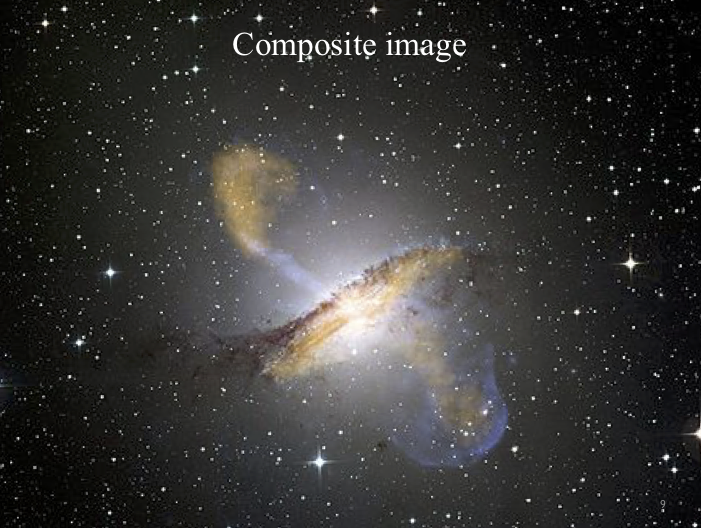

# 2. Using GW170817 to estimate the Hubble parameter

The event GW170817 was special because if was detected by *both* GW and EM detectors: (i) Gamma rays were seen less than two seconds after the two neutron stars merged.  (ii) An optical afterglow was seen in the vicinity of the galaxy NGC 4993 less than 1 day after the merger. (One had to wait until night fall to see the visible light.)  (iii) The effects of the binary neutron star merger were also seen in X-rays and radio waves as well, but several days after the merger.

It turns out that from this combination of EM and GW observations, we are able to estimate a quantity that is crucial for doing *cosmology* (the study of the evolution of the universe as a whole).  This quantity is the Hubble parameter $H_0$, which characterizes the uniform expansion of the universe via *Hubble's law*:

$$v = H_0 D$$

where $v$ is the recession velocity of e.g., a distant galaxy, and $D$ is its distance from us.  According to Hubble's law, more distant objects are receding faster from us than closer objects.  But note there is no preferred *center* of the expansion, since regardless of your location in the universe, you would still see distant objects receding from you with recession velocities given by the same Hubble's law that you use here on Earth.

As we will explain below, EM observations are good at giving us the recession velocity from a redshift measurement, while GW observations of a so-called *standard siren* (binary neutron star inspiral being an example) are good at giving us the distance to the source.  So from the measured values of $v$ and $D$, it is a simple matter to estimate the Hubble parameter via

$$H_0 = \frac{v}{D}$$

The following ipython notebook illustrates how one can calculate $v$ and $D$ from the data associated with GW170817, and hence estimate the Hubble constant.

### Load the relevant python packages

In [29]:
%load_ext autoreload
%autoreload 2

import sys

import numpy as np
import matplotlib.pylab as plt
import matplotlib.mlab as mlab

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Define some useful numerical constants

Speed of light $c$, Newton's gravitational constant $G$, etc.

In [30]:
# numerical constants
c = 299792458 # m/s
G = 6.67408e-11 # MKS
ly = 9.4607e15 # m
km = 1.e3 # m
Mpc = 3.086e22 # m
Msun = 1.98847e30 # kg
RE = 6371*km # m
Tsid = 23.9344699*60*60 # sec
#print Tsid

# 3. Determing the recession velocity from a redshift measurement

Recall that redshift of EM radiation is the EM equivalent of the Doppler effect for sound.  Relative motion of the source of an EM wave and an observer lead to a change in the frequency or, equivalently, the wavelength of the radiation.  Mathematically, the redshift $z$ is defined by 

$$z = \frac{\Delta\lambda}{\lambda} = \frac{\lambda'-\lambda}{\lambda}\approx \frac{v}{c}$$

where $\lambda'$ is the wavelength of the observed radiation, $\lambda$ is the wavelength of the emitted radiation (i.e., as measured at rest with respect to the source), $v$ is the relative (radial) velocity of the source and observer, and $c$ is the speed of light.  The approximate equality is for relative velocities small compared to the speed of light, which is valid for sources that are not too distant from us.

For GW170817, the host galaxy of the source was identified as NGC 4993, which is an old elliptical galaxy in the Hydra constellation.  We can get a spectrum of the NGC 4993 from the NASA Extra Galactic Database: 

http://ned.ipac.caltech.edu/byname?objname=NGC%204993&hconst=67.8&omegam=0.308&omegav=0.692

We first read in that spectrum from the data file and then plot the full spectrum.

--2019-08-29 15:28:27--  https://raw.githubusercontent.com/jkanner/aapt/master/NGC4993_spectrum.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.196.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.196.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66721 (65K) [text/plain]
Saving to: ‘NGC4993_spectrum.txt.3’

NGC4993_spectrum.tx 100%[===================>]  65.16K  --.-KB/s    in 0.004s  

2019-08-29 15:28:27 (14.8 MB/s) - ‘NGC4993_spectrum.txt.3’ saved [66721/66721]



Text(0, 0.5, 'Flux [Counts]')

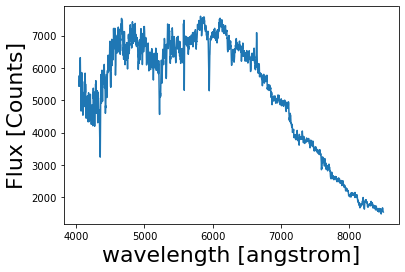

In [31]:
# NGC 4993 spectrum 
! wget https://raw.githubusercontent.com/jkanner/aapt/master/NGC4993_spectrum.txt
spectrum = np.loadtxt('NGC4993_spectrum.txt')
wavelength = spectrum[:,0]
flux = spectrum[:,1]

plt.figure()
plt.plot(wavelength, flux)
#plt.axvline(x=5951.68, color='green')
#plt.axvline(x=5952, color='green')
plt.grid(which='minor')
plt.xlabel('wavelength [angstrom]', size=22)
plt.ylabel('Flux [Counts]', size=22)
#plt.savefig('NGC4993_spectrum', bbox_inches='tight', dpi=400)

Note that the spectrum has several peaks and dips, which are *emission* and *absorption* lines.  Of particular interest is the strong absorption line just below 6000 Angstroms. This corresponds to the sodium D absorption, which has a rest wavelength $\lambda=5896~{\rm Angstrom}$.  To find the corresponding observed wavelength $\lambda'$, we simply find the minimum of the spectrum between 5800 and 6200 Angstroms.

In [32]:
# find wavelength of strong absorption line between 5800 and 6200 angstroms
n1 = np.where(5800 < wavelength)[0]
n2 = np.where(6200 < wavelength)[0]
ndx_min = np.argmin(flux[n1[0]:n2[0]])
lam_obs = wavelength[n1[0]+ndx_min]

print('lam_obs = '+ str(lam_obs) +' angstroms')

lam_obs = 5951.68 angstroms


This gives $\lambda'=5952~{\rm Angstroms}$, which we can then use to find $z$ and $v$.

In [33]:
# redshift calculation (assuming the absorption line is sodium D line)
lam = 5896. # sodium D line
z = (lam_obs-lam)/lam
v = z*c
print('redshift z = '+ str(z))
print('recession velocity v = '+ str(v/1e3) +' km/s')

redshift z = 0.009443690637720537
recession velocity v = 2831.1472288738273 km/s


The values we obtain, $z=0.0094$ and $v=2831~{\rm km/s}$, are close to those in the published literature, e.g., Hjorth et al., 2017, which has $z=0.0098$ and $v=2924~{\rm km/s}$.  So the EM observation has given us "one half" of the Hubble relation.

# 4. Determining the distance to the source using the GW observation

Just as EM observations are good at giving us recession velocities via redshift measurements, GW observations are good at giving us the distances to *standard sirens*.  These are the GW equivalent of *standard candles* from EM astronomy, which are sources for which we know a priori (or can determine from the measured data) their *absolute* luminosities.  Examples of standard candles in EM astronomy are Cepheid variable stars and Type Ia supernovae.  Standard candles are used in a leap-frog sort of way (called the *distance ladder*) to get estimates of the Hubble constant $H_0$ from EM observations alone.  On the other hand, the standard siren approach using GW observations will give estimates of $H_0$ *independent* of the EM distance ladder, and will thus avoid any of the potential systematic errors associated with the EM distance ladder estimate.  

## 4a. Standard candles and standard sirens

Recall the basic idea of a standard candle: The apparent brightness (or flux) $F$ and absolute luminosity $L$ are related by 

$$F = \frac{L}{4\pi D^2}$$

where $D$ is the distance to the source, sometimes called the *luminosity distance*, since it is defined in terms of the absolute luminosity $L$.  (We are assuming here that the source radiates equally well in all directions, so that the total power is spread out uniformly across the surface area of a sphere of radius $D$ centered at the source.) Thus, if we know $L$ for a standard candle and measure $F$, then $D$ can be easily calculated:

$$D = \sqrt{\frac{L}{4\pi F}}$$

The same reasoning applies to a GW standard siren, with binary inspiral being an example.  The absolute luminosity of an inspiraling binary is inversely proportional to the square of the number of cycles left before merger, $N_{\rm cycles} = f_{\rm gw}^2/\dot{f}_{\rm gw}$, where $f_{\rm gw}$ is the instantaneous GW frequency of the inspiral.  So $L$ is something that we can calculate from the data.  And then using the measured flux $F$, we can determine $D$.

But one can get the distance to the source more directly by using the following expression for the amplitude of the observed GW signal 

$$h = \frac{4c}{D}(\pi f_{\rm gw})^{2/3} \left(\frac{GM_{\rm c}}{c^3}\right)^{5/3}$$

which is a consequence of Einstein's *quadrupole formula* for gravitational waves.
In this equation, $G$ is the gravitational constant, $c$ is the speed of light, and 

$$M_{\rm c}\equiv \frac{(m_1 m_2)^{3/5}}{(m_1+m_2)^{1/5}} $$

is the chirp mass of the binary. Now recall from Amber's talk that we can also write

$$M_{\rm c}= 
\frac{c^3}{G}\left[\frac{5}{96\pi^{8/3}}\,\frac{\dot{f}{}_{\rm gw}}{f_{\rm gw}^{11/3}}\right]^{3/5}$$

which is directly calculable from the GW data.  So by simple rearrangement and substituion, we obtain

$$D = \frac{4c}{h}(\pi f_{\rm gw})^{2/3} \left(\frac{GM_{\rm c}}{c^3}\right)^{5/3}
= \frac{4c}{h}\frac{5}{96 \pi^2}\,\frac{\dot{f}_{\rm gw}}{f_{\rm gw}^{3}}$$

which gives $D$ in terms of $f_{\rm gw}$, $\dot{f}{}_{\rm gw}$, and $h$, which are all directly measurable from the GW waveform.

## 4b. Analyzing the GW waveform

For the distance calculation we will use the GW waveform appropriate for the LIGO Livingston observatory.  (The waveform detected by Hanford will be slightly different in overall amplitude.)  We first load in the gravitational waveform data from a file. We then plot it, focusing-in on the last 30 seconds before merger.

In [34]:
# load gravitational waveform from data file
! wget https://raw.githubusercontent.com/jkanner/aapt/master/GW170817.txt
waveform = np.loadtxt('GW170817.txt')
t = waveform[:,0]
h = waveform[:,1]
delta_t = t[1]-t[0]
fs = 1/delta_t # sample frequency
N = len(h) # total length of data

--2019-08-29 15:28:27--  https://raw.githubusercontent.com/jkanner/aapt/master/GW170817.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.196.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.196.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4493326 (4.3M) [text/plain]
Saving to: ‘GW170817.txt.4’

GW170817.txt.4      100%[===================>]   4.29M  --.-KB/s    in 0.1s    

2019-08-29 15:28:27 (40.3 MB/s) - ‘GW170817.txt.4’ saved [4493326/4493326]



Text(0, 0.5, 'h [strain]')

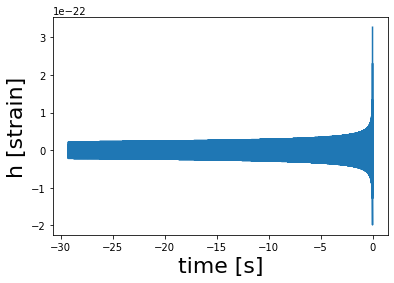

In [35]:
# plot waveform (zoom in on last 30 seconds before merger)
plt.figure()
plt.plot(t[N-np.int(fs*30):N], h[N-np.int(fs*30):N])
plt.xlabel('time [s]', size=22)
plt.ylabel('h [strain]', size=22)
#plt.savefig('waveform_zoom', bbox_inches='tight', dpi=400)

It is also helpful to produce a spectrogram of the data, which shows explicitly how the frequency changes with time.  It is easiest to estimate $\dot f_{\rm gw}$ from the spectrogram; it's just the slope to the curve evaluated at a particular frequency, e.g., $f_{\rm gw}=100~{\rm Hz}$. 

Text(0.5, 0, 'Time [sec]')

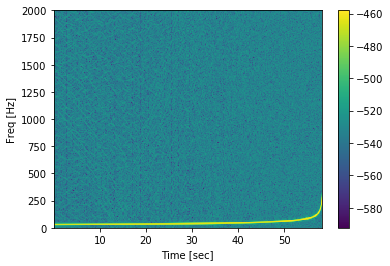

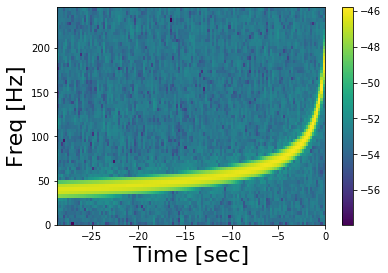

In [36]:
# plot spectrogram (zoom in on last 30 seconds and below 256 Hz)
NFFT = 1024
window = np.blackman(NFFT)
plt.figure()
spec_power, freqs, times, im = plt.specgram(h, NFFT=NFFT, Fs=fs, window=window)
plt.colorbar()
plt.ylabel('Freq [Hz]')
plt.xlabel('Time [sec]')
#plt.savefig('spectrogram', bbox_inches='tight', dpi=400)

plt.figure()
plt.pcolormesh(times[int((len(times)+1)/2):len(times)]-times[-1], freqs[0:64], np.log10(spec_power[0:64,int((len(times)+1)/2):len(times)]))
plt.colorbar()
plt.ylabel('Freq [Hz]', size=22)
plt.xlabel('Time [sec]', size=22)
#plt.savefig('spectrogram', bbox_inches='tight', dpi=400)

Use a straight edge to estimate $f_{\rm gw}$, $\dot f_{\rm gw}$, and $h$ from the spectrogram data.

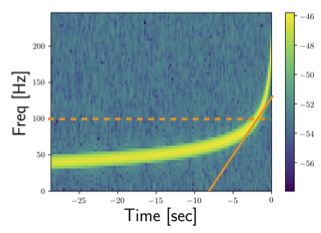

In [37]:
# from figures use pencil and paper to estimate slope and amplitude
f_gw = 100. # Hz
fdot_gw = (125.)/8. # Hz/s
h100 = 5e-23 # strain

From these values estimate the chirp mass to see if it's in the right ballpark (expect $M_c\approx 1.18~{\rm M}_{\rm solar}$).  Then estimate the distance to the source.

In [38]:
# estimate chirp mass from f, fdot
chirptime = ( (5./96.) * fdot_gw * f_gw**(-11./3.) * np.pi**(-8./3.) )**(3./5.)
chirpmass = chirptime * (c**3) /G 

print('M_chirp = '+ str(chirpmass/Msun) +' Msun')

M_chirp = 1.1439924008182443 Msun


In [39]:
# estimate distance from data (this is the effective distance)
D = (4.*c/h100)*(5./96.)*(1./np.pi**2)*fdot_gw*f_gw**-3

print('D = '+ str(D/Mpc) +' Mpc')

D = 64.08166984720528 Mpc


From this value of $D$ and the previously calculated recession velocity $v$, estimate the Hubble constant $H_0$.

In [40]:
# estimate H0 from v = H0*D taking D_eff=Deff and v from redshift measurement
H0 = (v/1.e3)/(D/Mpc)

print('H0 = '+ str(H0) +' km/s/Mpc')

H0 = 44.18029735530213 km/s/Mpc


The above value for the distance is too large compared to published value of $40~{\rm Mpc}$, and the corresponding value for the Hubble constant is too low (expected value $H_0\approx 70~{\rm km}\,{\rm s}^{-1}\,{\rm Mpc}^{-1}$).  So although we're in the right ball park (e.g., within a factor of two), our estimate of $D$ is not as good as one might have hoped.  So why is there this large discrepancy?

As is often the case "the devil is in the details."  It turns out that the distance we just calculated from the data was not the luminosity distance to the source, which we will denote now by $D_L$, but an *effective* distance $D_{\rm eff}$.  The effective distance and luminosity distance differ by terms involving the orientation of the source relative to the line of sight of the detector, as well as on the different responses of an interferometer to $+$ and $\times$ gravitational waves.  We will describe this more detailed calculation below.

## 4c. Estimating the distance from the inspiral range

But embarking on this more involved calculation, we can obtain another rough estimate of the luminosity distance by using the published binary neutron star inspiral range together with the measured matched-filter signal-to-noise ratio.  Since signal-to-noise ratio is inversely proportional to the distance to the source, we have SNR * distance = constant. Thus,

${\rm SNR}_{\rm threshold} * {\rm Inspiral\ range} = {\rm SNR}_{\rm measured} * D$ 

or 

$D = {\rm Inspiral\ range}\cdot {\rm SNR}_{\rm threshold}/{\rm SNR}_{\rm measured}$

where ${\rm SNR}_{\rm threshold}=8$.  The inspiral range ${\cal R}$ is an *average* distance in the sense that it gives a measure of the volume of space surveyed by a detector.  The volume $V=\frac{4}{3}\pi {\cal R}^3$ contains as many sources as those that produce a matched-filter signal-to-noise ratio ${\rm SNR} \ge {\rm SNR}_{\rm threshold}$ in the detector, assuming a homogeneous distribution of sources randomly oriented with respect to the line of sight to the detector.  The dependence of the luminosity distance on the location, orientation, and polarization of the source is effectively averaged-out in the calculation of ${\cal R}$.

Information about the BNS inspiral range around the time of GW170817 can be found https://www.gw-openscience.org/detector_status/day/20170817/ (see below).  Using that information (which gives us ${\cal R}\approx 100~{\rm Mpc}$) plus the statement in the detection paper that the signal had a measured SNR of 26.4 in the LIGO Livingston detector, allows us to estimate $D$.  We will denote this distance by $D_{\rm range}$ since it is a distance estimate determined from the binary inspiral range.  

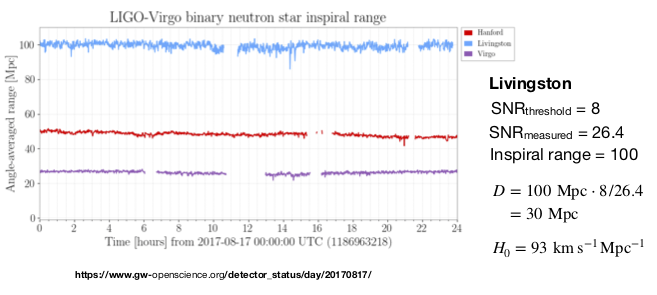

In [41]:
# another distance estimate

# the following numbers are appropriate for LLO
inspiral_range = 100. # Mpc
SNR_threshold = 8.
SNR_measured = 26.4
D_range = inspiral_range * SNR_threshold/SNR_measured
print('D_range = '+ str(D_range) +' Mpc')

D_range = 30.303030303030305 Mpc


This value for the distance is less than $D_{\rm eff}$ and a little closer to the published value $D_L= 40^{+8}_{-14}~{\rm Mpc}$.  As before, we can use this distance to estimate the Hubble constant $H_0$.  But because $D$ is too small, the estimate of $H_0$ is too large. 

In [42]:
# calculate H0 again using this estimate of D_L
H0 = (v/1.e3)/D_range

print('H0 = '+ str(H0) +' km/s/Mpc')

H0 = 93.4278585528363 km/s/Mpc


So to get a better answer, we will need to do the more detailed calculation.

## 4d. Estimating the luminosity distance using information about the detector geometry 

As mentioned earlier, the formula for $D$ that we used above does not gives us the luminosity distance $D_L$, but rather the effective distance 

$$
D_{\rm eff} = \frac{4c}{h}\frac{5}{96\pi^{2}}\,\frac{\dot{f}_{\rm gw}}{f_{\rm gw}^{3}}
$$

The effective distance is closely related to the luminosity distance, but also depends on the orientation of the source relative to the line of sight to the detector and on the different detector response to the $+$ and $\times$ polarizations of the gravitational wave.

### Polarization components 

To include all of these dependencies, we need to start by writing down the full expressions for the 
two polarization components $h_+$, $h_\times$:

\begin{equation}
\begin{aligned}
h_+ &= \frac{4c}{D_L}\left(\frac{GM_c}{c^3}\right)^{5/3}(\pi f)^{2/3}
\left(\frac{1+\cos^2\iota}{2}\right)\,\cos\Phi(t)
\\
h_\times &= \frac{4c}{D_L}\left(\frac{GM_c}{c^3}\right)^{5/3}(\pi f)^{2/3}
\cos\iota\,\sin\Phi(t)
\end{aligned}
\end{equation}

In these expressions, $\Phi(t)$ is the time-varying phase of the GW and $\iota$ is the *inclination angle*---i.e., the angle between the angular momentum vector $\vec L$ of the binary and the GW propagation vector $\vec k$, which points from the source to the detector.  Note that the polarization content of the GW depends on the inclination of the source.  For example, if $\iota=0^\circ$ or $180^\circ$ (so that the orbital plane is tangent to the plane of the sky--i.e., face-on or face-off), then the amplitudes are equal, $|h_+|=|h_\times|$, and the GW is *circularly* polarized.  If, on the other hand, $\iota=90^\circ$ (so that the orbital plane is seen edge on), then $h_\times$=0 and the GW is *linearly* polarized.

### Detector response functions

Now what's actually measured by a detector is a *linear combination* of $h_+$ and $h_\times$:

$$
h = h_+ F_+ + h_\times F_\times
$$

where $F_+$ and $F_\times$ quantify the response of the detector to the two different polarization modes.  These detector response functions depend on the direction of the source in the sky--i.e., its right ascension and declination $(\alpha,\delta)$, which define $\hat k$; the orientation of the two detector arms $\hat u$ and $\hat v$ at the time the signal was observed $t_{\rm obs}$; and the polarization angle $\psi$--i.e., the angle between the unit vector $\hat l$ (which is perpendicular to the plane spanned by $\vec k$ and $\vec L$) and the unit vector $\hat i$, which is perpendicular to $\vec k$ and points in the direction of decreasing right ascension with constant declination.  

If we define the unit vector $\hat m$ so that $\{\hat k,\hat l, \hat m\}$ is a right-handed system of basis vectors, then

$$
F_+= \sum_{a,b} e^+_{ab}D_{ab}\,,
\qquad 
F_x=\sum_{a,b} e^\times_{ab} D_{ab}
$$

where 

$$
D_{ab} = \frac{1}{2}(\hat u_a \hat u_b - \hat v_a \hat v_b)
$$

is the detector tensor and

$$
e^+_{ab} = \hat l_a \hat l_b - \hat m_a \hat m_b\,,
\qquad
e^\times_{ab} = \hat l_a \hat m_b + \hat m_a \hat l_b
$$

are the two polarization tensors.

### Relationship between effective distance and luminosity distance

Doing the above sum for $h$ in terms of $h_+$, $h_\times$, $F_+$, $F_\times$, we find

$$
h = \frac{4c}{D_{\rm eff}}\left(\frac{GM_c}{c^3}\right)^{5/3}(\pi f_{\rm gw})^{2/3}\,\cos[\Phi(t)+\phi_0]
$$

where 

$$
D_{\rm eff} \equiv \frac{D_L}{\sqrt{F_+^2\left(\frac{1+\cos^2\iota}{2}\right)^2 + F_\times^2\cos^2\iota}}\,,
\qquad
\phi_0 = \tan^{-1}\left[-\frac{F_\times\cos\iota}{F_+\frac{(1+\cos^2\iota)}{2}}\right]
$$

or, equivalently,

$$
D_L = D_{\rm eff}\sqrt{F_+^2\left(\frac{1+\cos^2\iota}{2}\right)^2 + F_\times^2\cos^2\iota}
$$

Thus, given our estimate of the effective distance, we can obtain an estimate of the luminosity distance by evaluating the terms in the square root.  Note that the luminosity distance is always *less than* the effective distance, since the square root has values between 0 and 1.

The python code below calculates the square root for the LIGO Livingston detector, and together with $D_{\rm eff}$, gives us an estimate of the luminosity distance $D_L$.

### Define some useful functions to take various products of vectors and tensors

In [43]:
def cross_product(u,v):
    
    # take the cross product of two 3-dimensional vectors u and v
    
    w = np.zeros(3)
    
    w[0] = u[1]*v[2]-u[2]*v[1]
    w[1] = u[2]*v[0]-u[0]*v[2]
    w[2] = u[0]*v[1]-u[1]*v[0]
            
    return w

In [44]:
def tensor_product(u,v):
    
    # take the tensor product of two vectors u and v, i.e., (u x v)_ab = u_a v_b
    
    N = len(u)
    uv = np.zeros([N,N])
    
    for JJ in range(0,N):
        for KK in range(0,N):
            uv[JJ,KK] = u[JJ]*v[KK]
            
    return uv

In [45]:
def ddot_product(u,v):
    
    # take double dot product of u and v, i.e., u:v = sum_a,b u_ab v_ab
    
    temp = np.matmul(u, np.transpose(v))
    y = np.trace(temp)
    
    return y

### Geometry of the LIGO Livingston detector 

First we specify the latitude and longitude of the LIGO Livingston detector (its vertex), and the direction of the perpendicular bisector of the two arms measured clockwise with respect to due North.  (These are *fixed* quantities, as they are defined with respect to the Earth-fixed Earth-centered reference frame.)  

In [46]:
# detector information for LIGO Livingston (approximate values; u=West, v=South)
lon = -90*np.pi/180.   # longitude (negative means W longitude)
lat = 30*np.pi/180.    # latitude (degrees north of equator) 
beta = 210*np.pi/180.  # angle of bisector measured CW wrt N

Since the Earth is rotating, the orientation of the detector arms depends on the time at which the signal was observed.  The relevant time is Greenwich Mean Sidereal Time, which gives the orientation of the Earth with respect to the vernal equinox (i.e., with respect to the fixed stars).  

We first convert the day (17 Aug 2017) and UTC time (12:41:04) to a Julian date ($JD$) using the on-line converter:

https://aa.usno.navy.mil/jdconverter?ID=AA&year=2017&month=8&day=17&era=1&hr=12&min=41&sec=4 

We then convert the Julian date to Greenwich Mean Sidereal Time via

$$D   = JD - 2451545.0$$

$$ GMST = 18.697374558 + 24.06570982441908 * D$$

and finally convert $GMST$ to hours between 0 and 24 via

$$gstHr = {\rm mod}(GMST, 24)$$

See https://aa.usno.navy.mil/faq/docs/GAST.php for details.

In [47]:
# convert observation time to GST (greenwich sidereal time)
# (17 Aug 2017, 12:41:04.43 UTC)
JD = 2457983.028519 # (https://aa.usno.navy.mil/jdconverter?ID=AA&year=2017&month=8&day=17&era=1&hr=12&min=41&sec=4)
D   = JD - 2451545.0 # (https://aa.usno.navy.mil/faq/docs/GAST.php)
GMST = 18.697374558 + 24.06570982441908 * D # (https://aa.usno.navy.mil/faq/docs/GAST.php)
gstHr = np.mod(GMST, 24)
print("gstHr =", gstHr, "hr")

gstHr = 10.423554144741502 hr


### Source information

We also need to enter in the source information---i.e., the source's right ascension and declination $(\alpha, \delta)$, inclination angle $\iota$, and polarization angle $\psi$.

Information about the inclination angle comes from a polarization measurement using data from the three detectors, LIGO Hanford, LIGO Livingston, and Virgo.  It turns out that this quantity is not well constrained, having allowed values beteen $125^\circ$ and $180^\circ$.  The value of the polarization angle $\psi$ is irrelevant if $\iota=180^\circ$; different values of $\psi$ lead to slightly different values of $D_L$ for $\iota=125^\circ$.  

One should run the following blocks of code for both $\iota=180^\circ$ and $\iota=125^\circ$.  For these two values, you should find $D_L = 48~{\rm Mpc}$ and $D_L=28~{\rm Mpc}$, consistent with the published estimate $D_L = 40^{+8}_{-14}~{\rm Mpc}$.

In [48]:
# source information
ra = 13+9/60.+48/3600.                # right ascension (13h, 09 m, 48 s)
dec = -(23+22/60.+53/3600.)           # declination (-23 deg, 22 arc min, 53 arc sec)
iota = 180*np.pi/180.                 # inclination angle
#iota = (180-55)*np.pi/180.            # inclination angle
psi = 0.*np.pi/180.                   # polarization angle (irrelevant if iota=180 or 0)

# convert (ra,dec) in (hrs,deg) to radians
alpha = ra*2*np.pi/24.  
delta = dec*np.pi/180.

In [49]:
# test case (optimally oriented, optimally aligned)
#iota = 0.
#psi = 30.  # can be anything for iota = 0
#delta = lat
#alpha = lon
#tobs = 0.*Tsid
#print alpha, delta, tobs

### Basis vectors, polarization vectors, and polarization tensors in different reference frames 

Components of vectors are defined with respect to the (Earth-centered) equatorial coordinate basis vectors $\{\hat e_1,\hat e_2,\hat e_3\}$. 

In [50]:
# equatorial coordinates (earth-centered)
e1 = np.array([1. , 0., 0.])
e2 = np.array([0. , 1., 0.])
e3 = np.array([0. , 0., 1.])

The wave frame basis vectors have the $z$ axis directed along the propagation vector $\hat k$.  The preferred polarization vectors $\hat l$, $\hat m$ (perpendicular to $\hat k$) are obtained by rotating the azimuthal and polar angle unit vectors $\hat i$, $\hat j$ (perpendicular to $\hat k$) through the polarization angle $\psi$.

In [51]:
# wave frame with z-axis = propagation vector reference vectors perpendicular to propagation direction)
khat = -np.cos(delta)*np.cos(alpha)*e1 - np.cos(delta)*np.sin(alpha)*e2 - np.sin(delta)*e3
ihat =  np.sin(alpha)*e1 - np.cos(alpha)*e2
jhat = -np.sin(delta)*np.cos(alpha)*e1 - np.sin(delta)*np.sin(alpha)*e2 + np.cos(delta)*e3

In [52]:
# wave frame with prefererred polarization vectors and corresponding polarization tensors
lhat =  np.cos(psi)*ihat + np.sin(psi)*jhat
mhat = -np.sin(psi)*ihat + np.cos(psi)*jhat

ep = tensor_product(lhat,lhat) - tensor_product(mhat,mhat)
ec = tensor_product(lhat,mhat) + tensor_product(mhat,lhat)

The (Earth-centered) Earth-fixed basis vectors $\{\hat E_1,\hat E_2,\hat E_3\}$ are obtained by setting $\hat E_3=\hat e_3$, and rotating the equatorial basis vectors $\hat e_1$, $\hat e_2$ through the angle $\gamma$ defined by the Greenwich mean sidereal time.

In [53]:
# earth-centered, earth fixed coordinates
gamma = gstHr*np.pi/12.
E1 =  np.cos(gamma)*e1 + np.sin(gamma)*e2
E2 = -np.sin(gamma)*e1 + np.cos(gamma)*e2
E3 =  e3

The quantities $A_+\equiv (1+\cos^2\iota)/2$ and $A_\times \equiv \cos\iota$ are obtained by taking the dot product of the source frame and wave frame polarization tensors, $s^+_{ab}$, $s^\times_{ab}$ and $e^+_{ab}$, $e^\times_{ab}$.

In [54]:
# source frame with z-axis given by angular momentum vector
s3 = np.cos(iota)*khat + np.sin(iota)*mhat
s1 = lhat
s2 = cross_product(s3, s1)

# source polarization tensors
sp = tensor_product(s1, s1) - tensor_product(s2, s2)
sc = tensor_product(s1, s2) + tensor_product(s2, s1)

In [55]:
# calculate amplitude factors A+, Ax (should equal (1+cos^2 i)/2 and cos i)
Ap = 0.5*ddot_product(ep, sp)
Ac = 0.5*ddot_product(ec, sc)

#print Ap, (1+np.cos(iota)**2)/2.
#print Ac, np.cos(iota)

### Detector tensor, detector response functions, and luminosity distance calculation

The detector tensor $D_{ab}\equiv (1/2)(u_au_b - v_a v_b)$ is calculated from the unit vectors $\hat u$, $\hat v$ pointing along the arms of the two detectors when the signal was observed.

In [56]:
# detector tensor (wrt earth-fixed frame)

# vector tangent to surface of earth at (lat, lon) pointing due North and due East
North = -np.sin(lat)*np.cos(lon)*E1 - np.sin(lat)*np.sin(lon)*E2 + np.cos(lat)*E3
East  = -np.sin(lon)*E1 + np.cos(lon)*E2

# unit vectors along the detector arms (assumes 90 degree opening angle)
uhat = np.sin(beta+np.pi/4.)*East + np.cos(beta+np.pi/4)*North
vhat = np.sin(beta-np.pi/4.)*East + np.cos(beta-np.pi/4)*North

# detector tensor
D = 0.5*(tensor_product(uhat, uhat) - tensor_product(vhat, vhat)) 
#print D

The detector response functions $F_+$, $F_\times$ are obtained by taking the "double dot product" of the detector tensor $D_{ab}$ and the wave-frame polarization tensors $e^+_{ab}$, $e^\times_{ab}$.

In [58]:
# antenna pattern functions
Fp = ddot_product(D,ep)
Fc = ddot_product(D,ec)

print(Fp, Fc)

0.19544988976133082 0.7199887560144582


Finally, the luminosity distance is calculated from the effective distance $D_{\rm eff}$ (which we obtained earlier, directly from the GW data) and the square-root factor involving $F_+$, $F_\times$, $A_+$, $A_\times$.  These values for the luminosity distance are now consistent with the values given in the literature, $D_L = 40^{+8}_{-14}~{\rm Mpc}$.

In [59]:
# luminosity distance (D_L = D_eff * sqrt{})
Deff = 64
theta = np.sqrt(Ap**2 * Fp**2 + Ac**2 * Fc**2)
DL = Deff*theta
print("DL =", DL, "Mpc")

DL = 47.746936883182045 Mpc


Below is a plot of the probability distribution for the Hubble parameter $H_0$, adapted from the published paper.  Note that the peak of the distribution is at $H_0 = 70~{\rm km}\,{\rm s}^{-1}\,{\rm Mpc}^{-1}$, consistent with $H_0 = v/D_L$, with $v= 2831~{\rm km/s}$ and $D_L=40~{\rm Mpc}$.  The wide spread in the probability distribution is due primarily to the uncertainty in the inclination angle $\iota$.  With more observations like GW170817, the estimate of the Hubble parameter will improve--i.e., the width of the distribution will become narrower.

In [60]:
DL = 40 # Mpc
H0 = (v/1.e3)/DL
print("H0 =", H0, "km/s/Mpc")

H0 = 70.77868072184569 km/s/Mpc


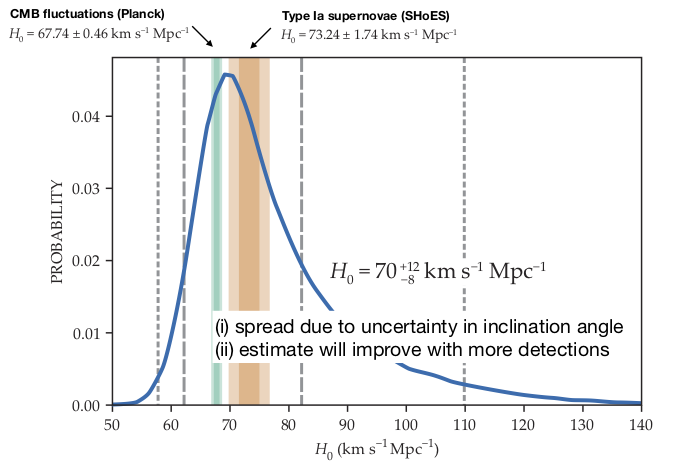

# 5. References

- "Measuring cosmic distances with standard sirens,” D.E. Holz, S.A. Hughes, B.F. Schutz, Physics Today 71,12, 34 (2018).

- "A gravitational-wave standard siren measurement of the Hubble constant,” Nature 551, 85-88, (2 Nov 2017).

- "GW170817: Observation of gravitational waves from a binary neutron star inspired,” PRL 119, 161101 (2017).

- "Determining the Hubble constant from gravitational wave observations,” B.F. Schutz, Nature 323, (25 Sep 1986).